# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [4]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from pprint import pprint

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

print(weather_api_key)

dff45efb4cc070eab252244deeb14d38


### Generate the Cities List by Using the `citipy` Library

In [5]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 644


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [6]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"


# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}appid={weather_api_key}&units=metric&q={city}"

    
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities

    response = requests.get(city_url)

    response_json = response.json()

    try:
        # Parse the JSON and retrieve data
        city_weather = response_json['weather']

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = response_json['coord']['lat']
        city_lng = response_json['coord']['lon']
        city_max_temp = response_json['main']['temp_max']
        city_humidity = response_json['main']['humidity']
        city_clouds = response_json['clouds']['all']
        city_wind = response_json['wind']['speed']
        city_country = response_json['sys']['country']
        city_date = response_json['dt']

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | taolanaro
City not found. Skipping...
Processing Record 2 of Set 1 | hermanus
Processing Record 3 of Set 1 | jamestown
Processing Record 4 of Set 1 | sao miguel do araguaia
Processing Record 5 of Set 1 | nikolskoye
Processing Record 6 of Set 1 | constitucion
Processing Record 7 of Set 1 | tsihombe
City not found. Skipping...
Processing Record 8 of Set 1 | pangkalanbuun
Processing Record 9 of Set 1 | thompson
Processing Record 10 of Set 1 | sechura
Processing Record 11 of Set 1 | busselton
Processing Record 12 of Set 1 | rikitea
Processing Record 13 of Set 1 | ushuaia
Processing Record 14 of Set 1 | imbituba
Processing Record 15 of Set 1 | chapais
Processing Record 16 of Set 1 | albany
Processing Record 17 of Set 1 | hambantota
Processing Record 18 of Set 1 | butaritari
Processing Record 19 of Set 1 | zyryanovsk
Processing Record 20 of Set 1 | chongwe
Processing Record 21 of Set 1 | belushya guba


In [7]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          589
Lat           589
Lng           589
Max Temp      589
Humidity      589
Cloudiness    589
Wind Speed    589
Country       589
Date          589
dtype: int64

In [8]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,hermanus,-34.4187,19.2345,21.56,76,100,6.07,ZA,1675792541
1,jamestown,42.0970,-79.2353,8.90,52,75,6.17,US,1675792422
2,sao miguel do araguaia,-13.2750,-50.1628,31.54,54,83,0.66,BR,1675792541
3,nikolskoye,59.7035,30.7861,-2.06,91,90,4.03,RU,1675792541
4,constitucion,-35.3333,-72.4167,21.84,52,4,2.11,CL,1675792542


In [9]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [10]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,hermanus,-34.4187,19.2345,21.56,76,100,6.07,ZA,1675792541
1,jamestown,42.0970,-79.2353,8.90,52,75,6.17,US,1675792422
2,sao miguel do araguaia,-13.2750,-50.1628,31.54,54,83,0.66,BR,1675792541
3,nikolskoye,59.7035,30.7861,-2.06,91,90,4.03,RU,1675792541
4,constitucion,-35.3333,-72.4167,21.84,52,4,2.11,CL,1675792542


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

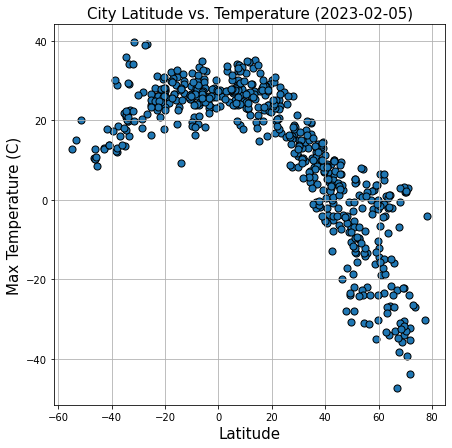

In [11]:
# Build scatter plot for latitude vs. temperature
city_data_df.plot(kind='scatter' , x='Lat' , y='Max Temp', grid=True,
                  edgecolors='black', s=50 ,figsize=(7,7))

# Incorporate the other graph properties
plt.xlabel('Latitude', fontsize=15)
plt.ylabel('Max Temperature (C)' ,fontsize=15)
plt.title('City Latitude vs. Temperature (2023-02-05)', fontsize=15)



# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

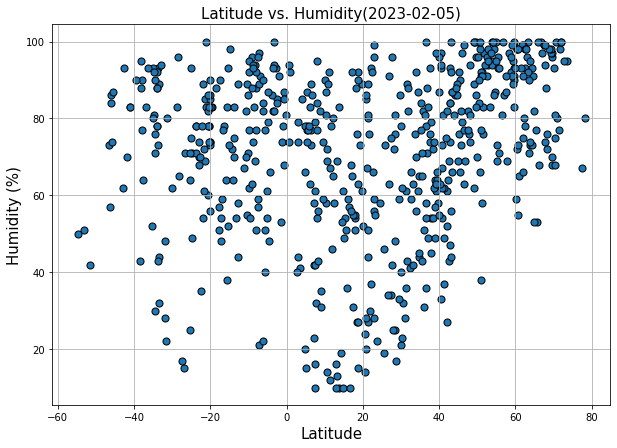

In [12]:
# Build the scatter plots for latitude vs. humidity
city_data_df.plot(kind='scatter' , x='Lat' , y='Humidity', grid=True,
                  edgecolors='black', s=50 ,figsize=(10,7))

# Incorporate the other graph properties
plt.xlabel('Latitude', fontsize=15)
plt.ylabel('Humidity (%)', fontsize=15)
plt.title('Latitude vs. Humidity(2023-02-05)' ,fontsize=15)

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

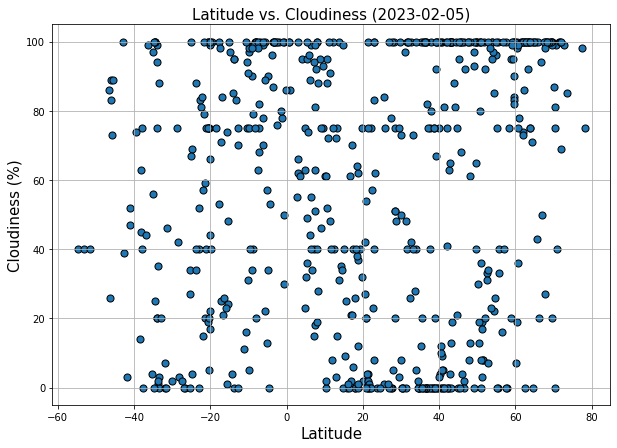

In [13]:
# Build the scatter plots for latitude vs. cloudiness
city_data_df.plot(kind='scatter' , x='Lat' , y='Cloudiness', grid=True,
                  edgecolors='black', s=50 ,figsize=(10,7))

# Incorporate the other graph properties
plt.xlabel('Latitude', fontsize=15)
plt.ylabel('Cloudiness (%)', fontsize=15)
plt.title('Latitude vs. Cloudiness (2023-02-05)' ,fontsize=15)

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

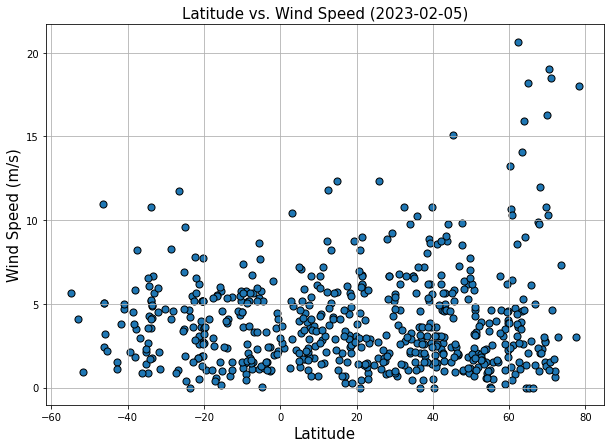

In [14]:
# Build the scatter plots for latitude vs. wind speed
city_data_df.plot(kind='scatter' , x='Lat' , y='Wind Speed', grid=True,
                  edgecolors='black', s=50 ,figsize=(10,7))

# Incorporate the other graph properties
plt.xlabel('Latitude', fontsize=15)
plt.ylabel('Wind Speed (m/s)', fontsize=15)
plt.title('Latitude vs. Wind Speed (2023-02-05)' ,fontsize=15)

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [44]:
# Define a function to create Linear Regression plots
def regression(dataframe , x_value , y_value):
    slope, int, r_squared, p_value, std_err = linregress(dataframe[x_value] , dataframe[y_value])
    regress_values = slope * dataframe[x_value] + int
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(int,2))
    print(f'The r-value is: {r_squared}')
    print(f'Line Equation: {line_eq}')
    dataframe.plot(kind='scatter' , x=x_value , y=y_value, grid=True,
                  edgecolors='black', s=50 ,figsize=(10,7))
    plt.plot(dataframe[x_value], regress_values, 'r-')
    plt.annotate(line_eq,(-40 , 9),fontsize=15,color="red")
    plt.xlabel('Latitude', fontsize=15)
    plt.ylabel(y_value, fontsize=15) 
    plt.title( f'{y_value} vs. Latitude' , fontsize=15)
    plt.show


In [16]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[city_data_df['Lat'] >=0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,jamestown,42.0970,-79.2353,8.90,52,75,6.17,US,1675792422
3,nikolskoye,59.7035,30.7861,-2.06,91,90,4.03,RU,1675792541
6,thompson,55.7435,-97.8558,-21.91,71,40,1.54,CA,1675792543
12,chapais,49.7834,-74.8492,-7.12,70,100,7.05,CA,1675792545
13,albany,42.6001,-73.9662,4.57,43,63,2.68,US,1675792368


In [17]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[city_data_df['Lat'] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,hermanus,-34.4187,19.2345,21.56,76,100,6.07,ZA,1675792541
2,sao miguel do araguaia,-13.2750,-50.1628,31.54,54,83,0.66,BR,1675792541
4,constitucion,-35.3333,-72.4167,21.84,52,4,2.11,CL,1675792542
5,pangkalanbuun,-2.6833,111.6167,23.38,93,100,0.97,ID,1675792542
7,sechura,-5.5569,-80.8222,30.46,51,22,5.35,PE,1675792543


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: -0.8756744065404135
Line Equation: y = -0.81x + 36.71


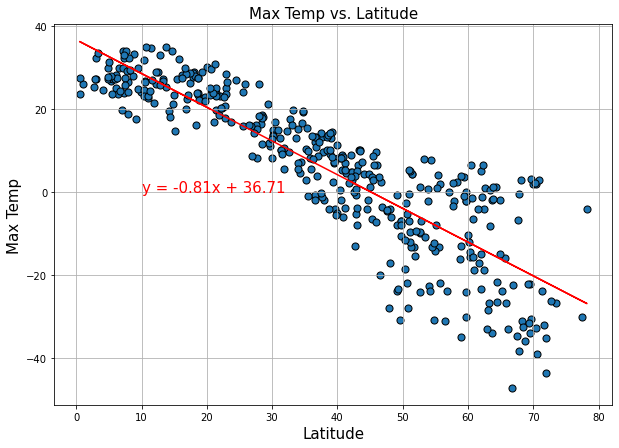

In [22]:
# Linear regression on Northern Hemisphere
regression(northern_hemi_df , 'Lat' , 'Max Temp')


The r-value is: 0.5033239344696728
Line Equation: y = 0.23x + 28.99


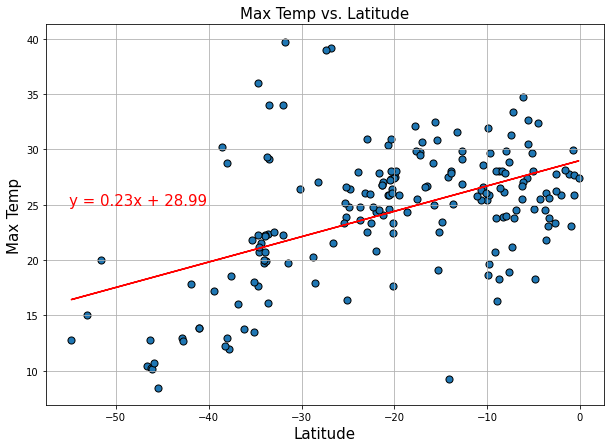

In [28]:
# Linear regression on Southern Hemisphere
regression(southern_hemi_df , 'Lat' , 'Max Temp')

**Discussion about the linear relationship:** YOUR RESPONSE HERE

The above graphs represent the max temperature for each city against latitude. The first graph are cities in the norther hemisphere and the second graph are cities in the soutern hemisphere. The northern hemisphere graph shows a strong negative correlation due to the fact that the range of cities used spans across most of the hemisphere (up to 80 degrees out of a possible 90 degrees). This makes sense since as you get closer to the north pole temperatures are going to keep getting colder.

In the southern hemisphere graph, we have a  positive correlation which makes sense since as you go from the south pole to the equator, temperatures are going to rise. The reason the correlation is not as strong as the northern hemisphere graph is because the range of cities is smaller. Here the cities start around -50 where as the northern hemisphere graph has cities as high 80 degree latitude. Surely, if we were able to plot cities past -50 degrees latiude then we would have a graph with much steeper slope. I think this also shows that as you get closer to the equator the rate at which temperature increase goes down. 

### Humidity vs. Latitude Linear Regression Plot

The r-value is: 0.48102408184611106
Line Equation: y = 0.57x + 49.38


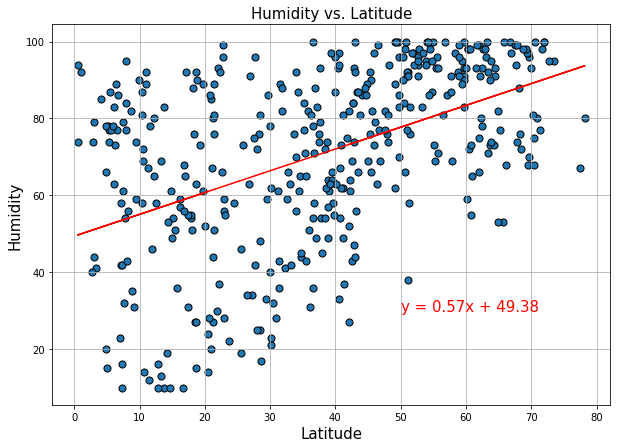

In [30]:
# Northern Hemisphere
regression(northern_hemi_df , 'Lat' , 'Humidity')

The r-value is: 0.10559561895038012
Line Equation: y = 0.15x + 75.85


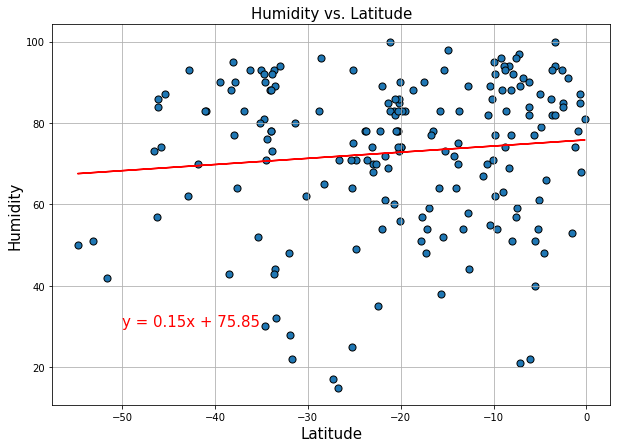

In [32]:
# Southern Hemisphere
regression(southern_hemi_df , 'Lat' , 'Humidity')

**Discussion about the linear relationship:** YOUR RESPONSE HERE

These graphs plot the humidity in each city against latitude for both hemispeheres on February 7th, 2023. The northern hemisphere graph shows a postive correlation suggesting that as you get closer to the north pole humidity goes up. I would not say this is a strong correlation though. Between latitude degrees 0 and 40, the points have a lot of variablility which shows that relationship here is somewhat weak. The variability does decrease as you get above 40 degrees latitude and the relationship does become stronger.

The graph for the soutern hemisphere does not show much a relationship between humidity and latitude. A lot of the cities are concentrated in the upper right hand corner which shows that a lot of the cities selected happen to be in the -30 to 0 degree latitude range. This shows that cities at or near the equator tend to have a lot of humidity.


### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 0.2171607737794217
Line Equation: y = 0.44x + 39.11


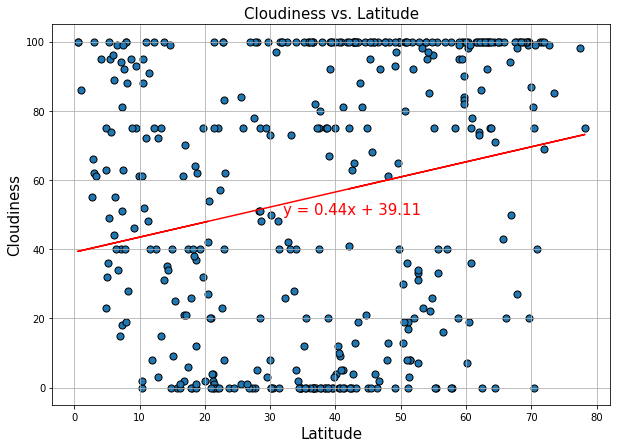

In [36]:
# Northern Hemisphere
regression(northern_hemi_df , 'Lat' , 'Cloudiness')

The r-value is: 0.28139517576942435
Line Equation: y = 0.77x + 74.98


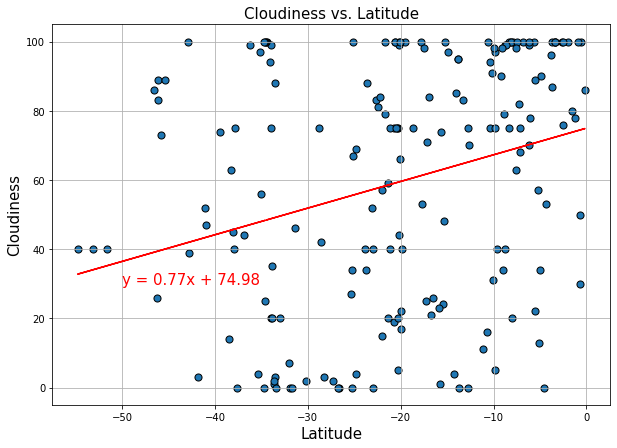

In [41]:
# Southern Hemisphere
regression(southern_hemi_df , 'Lat' , 'Cloudiness')

**Discussion about the linear relationship:** YOUR RESPONSE HERE

These graphs represent the cloudiness percentage in each city against latitude on February 7th, 2023. There is not much of a relationship in either graph to talk about. Considering that this is the cloudiness percentage for one day out of the year for each city, this might be dues to random chance which shows that each city might not consistently have the same cloudiness percentage every day. Nonetheless, there is no relationship to speak of here.

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: 0.10610868460702698
Line Equation: y = 0.02x + 3.37


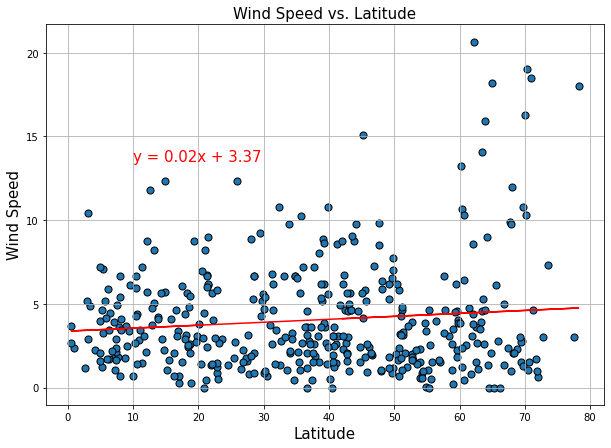

In [43]:
# Northern Hemisphere
regression(northern_hemi_df , 'Lat' , 'Wind Speed')

The r-value is: -0.13856335068159772
Line Equation: y = -0.02x + 3.18


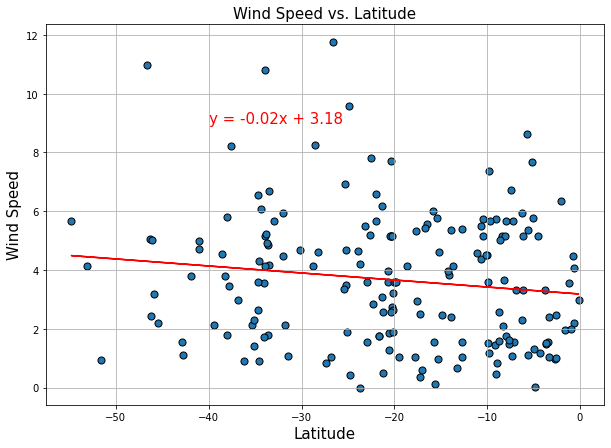

In [45]:
# Southern Hemisphere
regression(southern_hemi_df , 'Lat' , 'Wind Speed')

**Discussion about the linear relationship:** YOUR RESPONSE HERE

These graphs represent wind speed in each city on February 7th, 2023 against latidude. In the northern hemispshere, there is no correlation between wind speed and latitude. Almost all of the cities plotted are fit inside a range of 0 to 7.5 m/s.

In the southern hemisphere, there is a negative correlation showing that as you get closer to the equator wind speeds tends to slow down although most of the data is congregated between 0 and 6 m/s. This can be due to the fact most fo the cities lie between -30 and 0 degrees latitude which might mean they have very similiar climates. Again, this is data for only one day of the year and in order to get a better picture of what typically happens it would wise to gather many more samples from throughout the year. Moreover, this is just from one season as well. wind speed may change depending on whether it is fall , winter , spring or summer. 